In [ ]:
#Retail sales
#imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#importing dataset from drive
from google.colab import drive
drive.mount('/content/drive')
data=pd.read_csv('drive/My Drive/Projects/Walmart.csv')
data.head()

Mounted at /content/drive


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
data.info()    #data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
data.isna().sum()  #no null values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Removing unwanted cloumns

In [ ]:
data.drop(columns = ['Date'],inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 352.0 KB


Describing the data

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,6435.0,2.300000e+01,12.988182,1.000,12.000,23.000000,3.400000e+01,4.500000e+01
Weekly_Sales,6435.0,1.046965e+06,564366.622054,209986.250,553350.105,960746.040000,1.420159e+06,3.818686e+06
Holiday_Flag,6435.0,6.993007e-02,0.255049,0.000,0.000,0.000000,0.000000e+00,1.000000e+00
Temperature,6435.0,6.066378e+01,18.444933,-2.060,47.460,62.670000,7.494000e+01,1.001400e+02
Fuel_Price,6435.0,3.358607e+00,0.459020,2.472,2.933,3.445000,3.735000e+00,4.468000e+00
CPI,6435.0,1.715784e+02,39.356712,126.064,131.735,182.616521,2.127433e+02,2.272328e+02
Unemployment,6435.0,7.999151e+00,1.875885,3.879,6.891,7.874000,8.622000e+00,1.431300e+01


Data Visualization

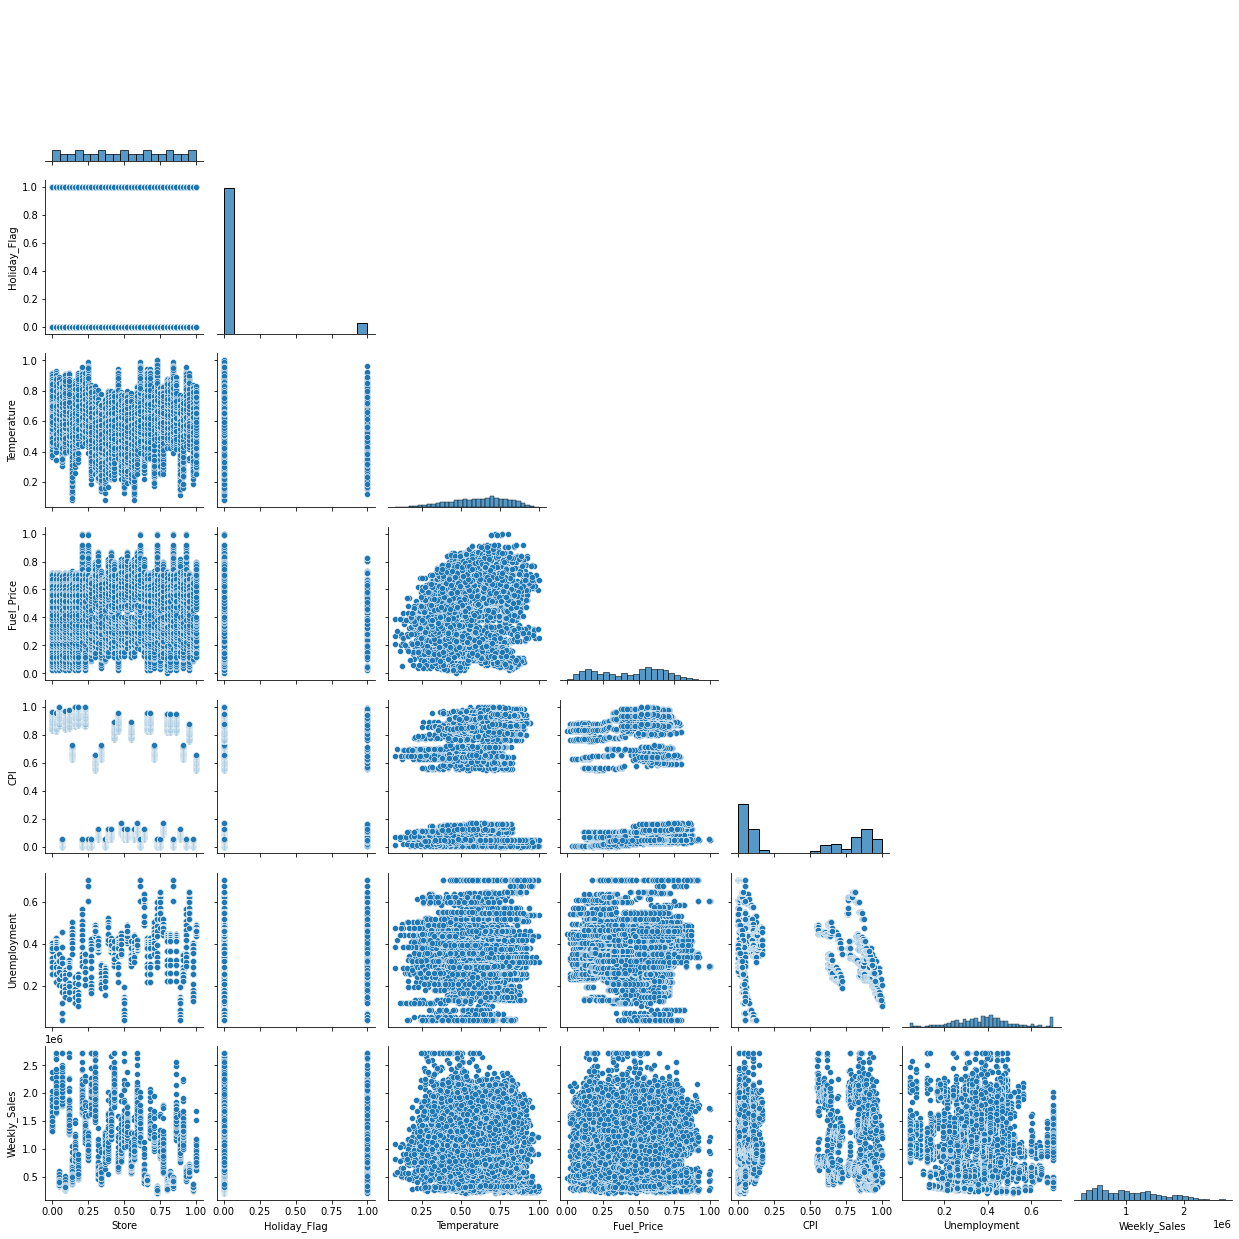

In [ ]:
sns.pairplot(data,corner=True)

Correlation

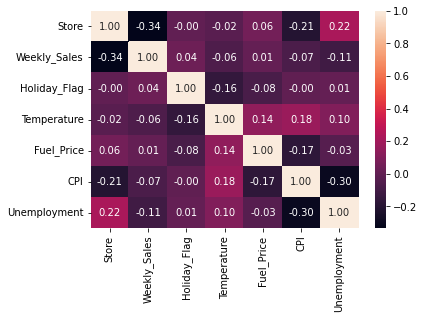

In [ ]:
sns.heatmap(data.corr(),annot=True,fmt='.2f')
plt.show()

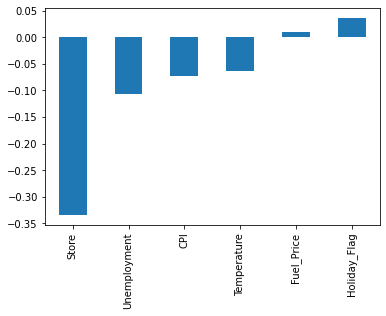

In [ ]:
data.corr()['Weekly_Sales'].sort_values()[:-1].plot(kind='bar')

Selecting independent and dependent variables.

In [ ]:
x = data.drop(columns = ["Weekly_Sales"])
y = data["Weekly_Sales"]

Normalization

In [ ]:
for i in x.columns:
    x[i]=(x[i]-x[i].min())/(x[i].max()-x[i].min())
data=pd.concat([x,y],axis=1)  #Normalized data

Checking the Outliers

In [ ]:
def detect_outlier(data):
    q1, q3 = np.percentile(sorted(data), [25, 75])
    lower_bound = q1 - (1.5 * (q3-q1))
    upper_bound = q3 + (1.5 * (q3-q1))

    outliers = [x for x in data if x <= lower_bound or x >= upper_bound]
 
    return outliers

print(detect_outlier((data['Weekly_Sales'])))
print(detect_outlier((data['Temperature'])))

print(detect_outlier((data['Fuel_Price'])))

print(detect_outlier((data['CPI'])))
print(detect_outlier((data['Unemployment'])))

#There are outliers in 'Weekly_Sales','Temperature' and 'Unemployment'


[3436007.68, 3224369.8, 2789469.45, 2740057.14, 3526713.39, 3004702.33, 2771397.17, 3676388.98, 2727575.18, 2939946.38, 2811646.85, 3749057.69, 2950198.64, 3487986.89, 2766400.05, 2771646.81, 3595903.2, 2864170.61, 2760346.71, 3556766.03, 2921709.71, 2762861.41, 3818686.45, 3369068.99, 2811634.04, 2752122.08, 2819193.17, 3766687.43, 2906233.25, 2762816.65, 3555371.03, 2734277.1, 3078162.08, 2739019.75]
[0.0, 0.08111545988258317, 0.07436399217221135]
[]
[]
[0.018976423231742374, 0.018976423231742374, 0.018976423231742374, 0.018976423231742374, 0.018976423231742374, 0.018976423231742374, 0.018976423231742374, 0.018976423231742374, 0.018976423231742374, 0.018976423231742374, 0.018976423231742374, 0.018976423231742374, 0.018976423231742374, 0.0, 0.0, 0.0, 0.0, 0.9676059037761164, 0.9676059037761164, 0.9676059037761164, 0.9676059037761164, 0.9676059037761164, 0.9676059037761164, 0.9676059037761164, 0.9676059037761164, 0.9794901284262986, 0.9794901284262986, 0.9794901284262986, 0.97949012842

Visualising Outliers:

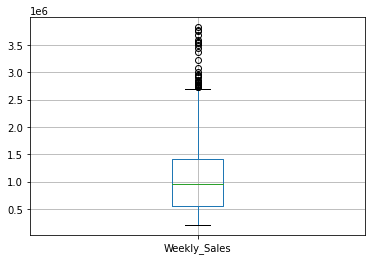

In [ ]:
data.boxplot(column='Weekly_Sales')
plt.show()

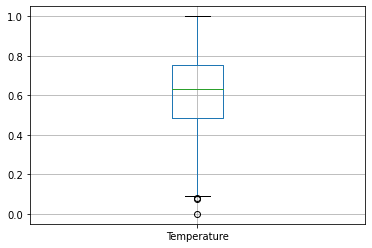

In [ ]:
data.boxplot(column='Temperature')
plt.show()

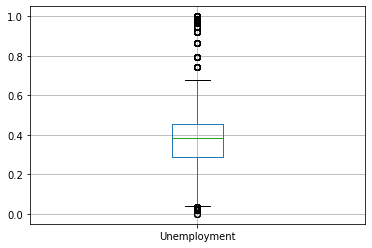

In [ ]:
data.boxplot(column='Unemployment')
plt.show()

Treating Outliers

In [ ]:
def treat_outliers():
    l = ["Weekly_Sales","Temperature","Unemployment"]
    for i in l:
        x = np.quantile(data[i],[0,0.25,0.50,0.75])
        iqr = x[3]-x[1]
        upper_whisker = x[3]+1.5*iqr
        lower_whisker = x[1]-1.5*iqr
        data[i] = np.where(data[i]>upper_whisker,upper_whisker,(np.where(data[i]<lower_whisker,lower_whisker,data[i])))
treat_outliers()

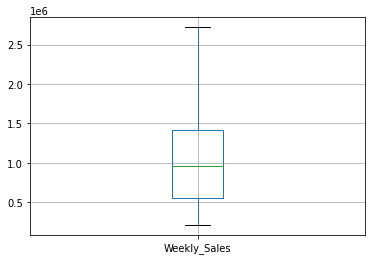

In [ ]:
data.boxplot(column='Weekly_Sales')
plt.show()

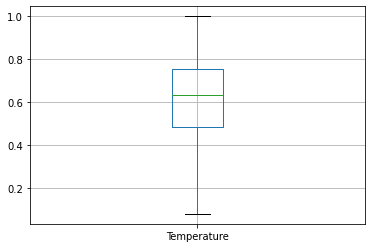

In [ ]:
data.boxplot(column='Temperature')
plt.show()

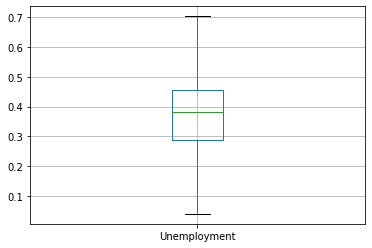

In [ ]:
data.boxplot(column='Unemployment')
plt.show()

Splitting dataset into training and testing data

In [ ]:
a = data.drop(columns = ["Weekly_Sales"])
b = data["Weekly_Sales"]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(a, b, test_size= 0.25, random_state=0)

# ***LinearRegression***

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Prediction

In [ ]:
predict_train=lr.predict(x_train)
predict_test=lr.predict(x_test)

Accuracy

In [ ]:
#Accuracy for Regression algorithm
from sklearn.metrics import mean_squared_error
rmse_train=mean_squared_error(y_train,predict_train)
print(f"RMSE of train dataset is {rmse_train}")

from sklearn.metrics import r2_score
print(f"r2_score of train dataset is {r2_score(y_train,predict_train)}")

RMSE of train dataset is 268733216746.55814
r2_score of train dataset is 0.1337307975033203


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predict_test)

423697.69864090247

In [ ]:
np.sqrt(mean_squared_error(y_test,predict_test))

511676.0839951526

In [ ]:
data['Weekly_Sales'].describe()

count    6.435000e+03
mean     1.045029e+06
std      5.572961e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      2.720371e+06
Name: Weekly_Sales, dtype: float64

# ***Polynomial Regression***

In [ ]:
x=data.drop('Weekly_Sales',axis=1)
y=data['Weekly_Sales']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

Polynomial Fearturing

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_converter=PolynomialFeatures(degree=2,include_bias=False)
poly_features=poly_converter.fit_transform(x)

Respliting data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.20, random_state=101)

In [ ]:
poly_model=LinearRegression()
poly_model.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=poly_model.predict(x_test)

Accuracy

In [ ]:
mean_absolute_error(y_test,y_pred)

397950.0413058977

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))
#Linear Regression is more accuracte with respective of mean_absolute_error
#Than Polynomial Regression
#Lets try increasing degree of polynomial

480979.5502506634

In [ ]:
for i in range(1,10):
    
    poly_converter=PolynomialFeatures(degree=i,include_bias=False)
    poly_features=poly_converter.fit_transform(x)
    
    x_train, x_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.20, random_state=101)
    
    poly_model=LinearRegression()
    poly_model.fit(x_train,y_train)
    
    test_preds=poly_model.predict(x_test)
    
    mae_test=mean_absolute_error(y_test,test_preds)
    
    print(f"for {i}th degree mean_absolute_error for testing dataset is {mae_test}")

#Max accuracy is obtained in 1 degree featuring

for 1th degree mean_absolute_error for testing dataset is 438436.6178728132
for 2th degree mean_absolute_error for testing dataset is 397950.0413058977
for 3th degree mean_absolute_error for testing dataset is 354328.68092039105
for 4th degree mean_absolute_error for testing dataset is 306542.55235865375
for 5th degree mean_absolute_error for testing dataset is 269584.90891493263
for 6th degree mean_absolute_error for testing dataset is 311627.59682197333
for 7th degree mean_absolute_error for testing dataset is 436816589280.44415
for 8th degree mean_absolute_error for testing dataset is 127146317808.12767
for 9th degree mean_absolute_error for testing dataset is 4622052060560.32


# ***Support Vector Machine***

In [ ]:
x=data.drop('Weekly_Sales',axis=1)
y=data['Weekly_Sales']

In [ ]:
#splitting dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

#scaling
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.svm import SVR
svr=SVR()

In [ ]:
param_grid={'kernel':['linear','poly','rbf'],
            'gamma':['scale','auto'],
            'degree':[2,3,4],
            'C':[0.001,0.1,1,1.5],
            'epsilon':[0.001,0.1,1,2,5]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_model=GridSearchCV(svr,param_grid=param_grid,cv=5)

In [ ]:
grid_model.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.1, 1, 1.5], 'degree': [2, 3, 4],
                         'epsilon': [0.001, 0.1, 1, 2, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

Prediction

In [ ]:
y_pred=grid_model.predict(x_test)

Accuracy

In [ ]:
mean_absolute_error(y_test,y_pred)

397950.0413058977

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

480979.5502506634

In [ ]:
data['Weekly_Sales'].describe()

count    6.435000e+03
mean     1.045029e+06
std      5.572961e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      2.720371e+06
Name: Weekly_Sales, dtype: float64

# ***Bayesian Linear Regression***

In [ ]:
x=data.drop('Weekly_Sales',axis=1)
y=data['Weekly_Sales']

In [ ]:
#splitting dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

#scaling
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import BayesianRidge
model = BayesianRidge()
model.fit(x_train, y_train)

BayesianRidge()

Prediction

In [ ]:
y_pred=model.predict(x_test)

Accuracy

In [ ]:
mean_absolute_error(y_test,y_pred)

438571.9358586787

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

528268.8288877169

In [ ]:
data['Weekly_Sales'].describe()   ####Most accuract result is obtained by Bayesian Linear Regression

count    6.435000e+03
mean     1.045029e+06
std      5.572961e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      2.720371e+06
Name: Weekly_Sales, dtype: float64

# ***Lasso Regressor***

In [ ]:
x=data.drop('Weekly_Sales',axis=1)
y=data['Weekly_Sales']

In [ ]:
#splitting dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=101)

#scaling
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(normalize=True)
lasso_reg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  FutureWarning,


Lasso(normalize=True)

Prediction

In [ ]:
y_pred =lasso_reg.predict(x_test)

Accuracy

In [ ]:
mean_absolute_error(y_test,y_pred)

438441.57276961685

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

528189.1982058634

In [ ]:
data['Weekly_Sales'].describe()

count    6.435000e+03
mean     1.045029e+06
std      5.572961e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      2.720371e+06
Name: Weekly_Sales, dtype: float64